**Autor:** Victor Teixidó López

In [1]:
#!pip3 install unidecode

In [2]:
import sys
import re
from unidecode import unidecode

import matplotlib.pyplot as plt

## LAB1 CDI-FIB

## Alphabet simplification

In [3]:
def clean_text(txt):
    txt = txt.lower()   # underscore text
    txt = unidecode(txt)    # only 26 alphabet characters
    txt = re.sub(r'[^a-z\s]','',txt)    # only 26 alphabet chars and spaces
    txt = re.sub('[\n]',' ',txt)
    txt = re.sub(' +', ' ', txt)    # replace multiple whitespace
    return txt

### Spanish

In [4]:
quijote_txt = open('quijote.txt','r', encoding="utf8")
quijote_cleaned = clean_text(quijote_txt.read())
open('quijote_cleaned.txt','w').write(quijote_cleaned);

### English

In [5]:
copperfield_txt = open('copperfield.txt','r', encoding="utf8")
copperfield_cleaned = clean_text(copperfield_txt.read())
open('copperfield_cleaned.txt','w').write(copperfield_cleaned);

### French

In [6]:
miserables_txt = open('miserables.txt','r', encoding="utf8")
miserables_cleaned = clean_text(miserables_txt.read())
open('miserables_cleaned.txt','w').write(miserables_cleaned);

### German

In [7]:
buddenbrooks_txt = open('buddenbrooks.txt','r', encoding="utf8")
buddenbrooks_cleaned = clean_text(buddenbrooks_txt.read())
open('buddenbrooks_cleaned.txt','w').write(buddenbrooks_cleaned);

## Word length

In [8]:
def avg_words(txt):
    words_txt = txt.split()
    chars_each_word_txt = [len(w) for w in words_txt]
    avg_words = sum(chars_each_word_txt) / len(words_txt)

    return avg_words

In [9]:
avg_quijote = avg_words(quijote_cleaned)
avg_copperfield = avg_words(copperfield_cleaned)
avg_miserables = avg_words(miserables_cleaned)
avg_buddenbrooks = avg_words(buddenbrooks_cleaned)

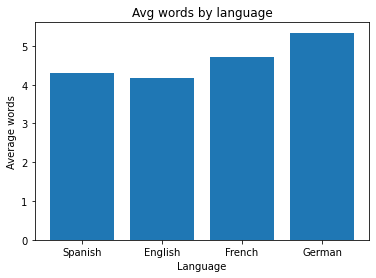

In [10]:
x = ['Spanish','English','French','German']
y = [avg_quijote,avg_copperfield,avg_miserables,avg_buddenbrooks]

plt.bar(x,y)
plt.xlabel('Language')
plt.ylabel('Average words')
plt.title('Avg words by language')
plt.show()

## Letters statistics

In [11]:
from collections import Counter

def source_fromtext(txt):
    freq_letters = dict(Counter(txt))
    freq_letters = sorted(freq_letters.items())
    return freq_letters

In [12]:
# Spanish text
freq_list_quijote = source_fromtext(quijote_cleaned)
letters_quijote = [elem[0] for elem in freq_list_quijote]
freq_quijote = [elem[1] for elem in freq_list_quijote]

# English text
freq_list_copperfield = source_fromtext(copperfield_cleaned)
letters_copperfield = [elem[0] for elem in freq_list_copperfield]
freq_copperfield = [elem[1] for elem in freq_list_copperfield]

# French text
freq_list_miserables = source_fromtext(miserables_cleaned)
letters_miserables = [elem[0] for elem in freq_list_miserables]
freq_miserables = [elem[1] for elem in freq_list_miserables]

# German text
freq_list_buddenbrooks = source_fromtext(buddenbrooks_cleaned)
letters_buddenbrooks = [elem[0] for elem in freq_list_buddenbrooks]
freq_buddenbrooks = [elem[1] for elem in freq_list_buddenbrooks]

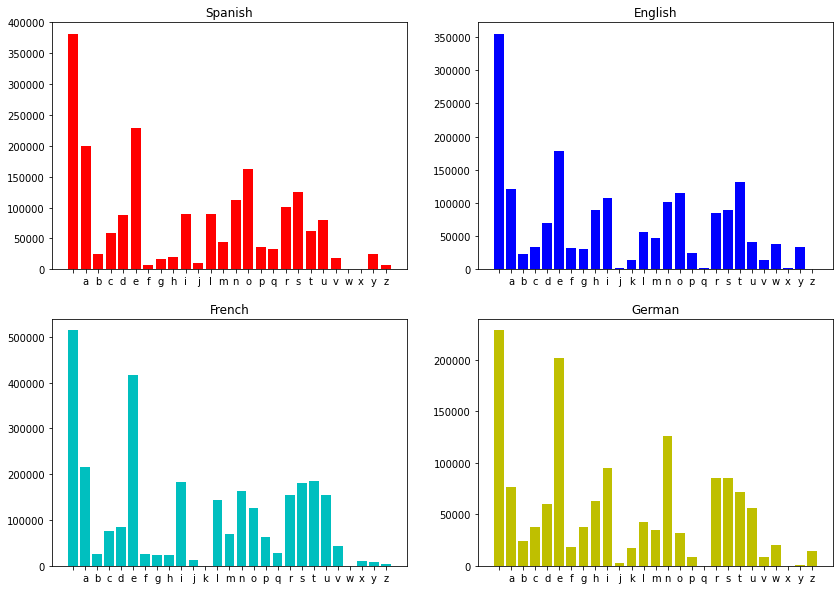

In [13]:
fig,ax = plt.subplots(2,2,figsize=(14,10))

ax[0][0].bar(letters_quijote, freq_quijote, color='r');
ax[0][0].set_title('Spanish');

ax[0][1].bar(letters_copperfield, freq_copperfield, color='b');
ax[0][1].set_title('English');

ax[1][0].bar(letters_miserables, freq_miserables, color='c');
ax[1][0].set_title('French');

ax[1][1].bar(letters_buddenbrooks, freq_buddenbrooks, color='y');
ax[1][1].set_title('German');

## Random text

In [14]:
import random

def random_text(txt, n):
    # to get words without whitespaces uncomment next line
    #txt = re.sub(' ','',txt)
    
    char_list = list(txt)
    random_text = ''.join(random.choices(char_list, k=n))
    
    return random_text

In [15]:
# Random spanish word
print('Random spanish word:', random_text(quijote_cleaned,10))

# Random english word
print('Random english word:', random_text(copperfield_cleaned,10))

# Random french word
print('Random french word:', random_text(miserables_cleaned,10))

# Random german word
print('Random german word:', random_text(buddenbrooks_cleaned,10))

Random spanish word:   dd duaoa
Random english word: a holh iuy
Random french word: stmlaee ur
Random german word: cd i e kos


## Random text with context

In [16]:
def random_text_Markov(txt, k, n):
    if k == 0:
        return random_text(txt,n)
    
    # Create the dictionary of substrings and the following characters
    markov_dict = {}
    for i in range(len(txt) - k):
        substring = txt[i:i+k]
        next_char = txt[i+k]
        if substring not in markov_dict:
            markov_dict[substring] = []
        markov_dict[substring].append(next_char)

    # Generate the random text
    current_substring = random.choice(list(markov_dict.keys()))
    result = current_substring
    for i in range(n - k):
        if current_substring not in markov_dict:
            break
        next_char = random.choice(markov_dict[current_substring])
        result += next_char
        current_substring = result[-k:]

    return result

In [17]:
markov_word = random_text_Markov(quijote_cleaned,1,40)

print(markov_word)

bal vil decha pas mimo la l hamonde s s 


## LAB2 CDI-FIB

## Codification and decodification

In [18]:
corr = [('a','1'),('b','2'),('c','3'),('d','4'),('zz','5')]

In [19]:
def encode(txta,corr):
    corr = dict(corr)
    txt_encoded = ''
    i, j = 0, 0
    while j<=len(txta):
        substring = txta[i:j]
        if substring in corr:
            txt_encoded += corr[substring]
            i = j
        j += 1
        
    if i != len(txta): # all the text could not be processed
        return 'Message could not be encoded'
    return txt_encoded

In [20]:
txta = 'abcdzz'
print(txta,'codification:',encode(txta,corr))
txta = 'abcdzzz'
print(txta,'codification:',encode(txta,corr))

abcdzz codification: 12345
abcdzzz codification: Message could not be encoded


In [22]:
def decode(txtb,corr):
    corr = dict(corr)
    corr_keys = list(corr.keys())
    corr_values = list(corr.values())
    txt_decoded = ''
    i, j = 0, 0
    while j<=len(txtb):
        substring = txtb[i:j]
        if substring in corr_values:
            pos = corr_values.index(substring)
            txt_decoded += corr_keys[pos]
            i = j
        j += 1
        
    if i != len(txtb): # all the text could not be processed
        return 'Message could not be decoded'
    return txt_decoded

In [23]:
txtb = '12345'
print(txtb,'decodification:',decode(txtb,corr))

12345 decodification: abcdzz


## Canonical code

In [24]:
def kraft_inequality(lengths, q):
    s = 0
    for l in lengths:
        s += q**-l

    return s <= 1

def format_to_alf(number, base, length, alf):
    if number == 0:
        res = alf[0]
        if length == 1:
            return res
        else:
            count = 1
            digits = []
            digits.append(res)
            while (count < length):
                digits.insert(0, alf[0])
                count +=1
            res = ''.join(str(e) for e in digits[::-1])
            return res

    digits = []
    while number > 0:
        digits.append(alf[int(number % base)])
        number //= base
    count = len(digits)
    while (count < length):
                digits.append(alf[0])
                count +=1        
    res = ''.join(str(e) for e in digits[::-1])
    return res

In [25]:
from collections import Counter
def canonical_code(L,q=2, alf = [0,1]):
    if not kraft_inequality(L, q):
        return 'The entry does not satisfy Kraft-McMillan inequality.'
    
    bl_count = Counter(L)
    code = 0
    bl_count[0] = 0
    next_code = {}
    maximum = max(L) + 1       
    for l in range (1, maximum):
        code = (code + bl_count[l-1])*q
        next_code[l] = code 
    def_code = []
    lengths = {}
    for l in L:
        length = l
        def_code.append(next_code[length])
        lengths[next_code[length]] = length
        next_code[length] += 1
    def_code = list(map(lambda x: format_to_alf(x,q,lengths[x], alf),def_code))
    return def_code

In [26]:
print(canonical_code([2,2,3,3,3,3,4],2,['0','1']))

print(canonical_code([81,81,12,2,3,7,6,15,9,9,9,9,21,3,5],2,['0','1']))

The entry does not satisfy Kraft-McMillan inequality.
['100100000001001000001000000000000000000000000000000000000000000000000000000000000', '100100000001001000001000000000000000000000000000000000000000000000000000000000001', '100100000000', '00', '010', '1000110', '100010', '100100000001000', '100011100', '100011101', '100011110', '100011111', '100100000001001000000', '011', '10000']


## Shannon code

In [27]:
import math

def shannon_code(src):
    weights = [x[1] for x in src]
    probs = [x[1]/sum(weights) for x in src]
    
    shannon_longitudes = [int(-math.log(p,2))+1 for p in probs]
    
    return canonical_code(shannon_longitudes)

## Testing

In [28]:
txt = open("quijote_clean.txt","r",encoding="utf-8").read(); txt[:1000]

'el ingenioso hidalgo don quijote de la mancha tasa yo juan gallo de andrada escribano de camara del rey nuestro senor de los que residen en su consejo certifico y doy fe que habiendo visto por los senores del un libro intitulado el ingenioso hidalgo de la mancha compuesto por miguel de cervantes saavedra tasaron cada pliego del dicho libro a tres maravedis y medio el cual tiene ochenta y tres pliegos que al dicho precio monta el dicho libro docientos y noventa maravedis y medio en que se ha de vender en papel y dieron licencia para que a este precio se pueda vender y mandaron que esta tasa se ponga al principio del dicho libro y no se pueda vender sin ella y para que dello conste di la presente en valladolid a veinte dias del mes de deciembre de mil y seiscientos y cuatro anos juan gallo de andrada testimonio de las erratas este libro no tiene cosa digna que no corresponda a su original en testimonio de lo haber correcto di esta fee en el colegio de la madre de dios de los teologos de

In [29]:
src = source_fromtext(txt); print(src)

[(' ', 381208), ('a', 200499), ('b', 24147), ('c', 59437), ('d', 87240), ('e', 229191), ('f', 7581), ('g', 17225), ('h', 19920), ('i', 90077), ('j', 10530), ('l', 89143), ('m', 44658), ('n', 112683), ('o', 162514), ('p', 35465), ('q', 32483), ('r', 100955), ('s', 125728), ('t', 61749), ('u', 79560), ('v', 17856), ('w', 2), ('x', 377), ('y', 25115), ('z', 6491)]


In [30]:
canonical_code([8,8,2,2,3,7,6,5,9,9,9,9,2,3,5],2,[0,1])

'The entry does not satisfy Kraft-McMillan inequality.'

In [31]:
canonical_code([81,81,12,2,3,7,6,15,9,9,9,9,21,3,5],2,[0,1])

['100100000001001000001000000000000000000000000000000000000000000000000000000000000',
 '100100000001001000001000000000000000000000000000000000000000000000000000000000001',
 '100100000000',
 '00',
 '010',
 '1000110',
 '100010',
 '100100000001000',
 '100011100',
 '100011101',
 '100011110',
 '100011111',
 '100100000001001000000',
 '011',
 '10000']

In [32]:
canonical_code([3,10,7,5,5,5,8,8,9,8,8,2,3,3,1,5,3,3,3,2,2],7,['a','b','c','d','e','f','g'])

['bda',
 'bdgaeabeba',
 'bdgaeaa',
 'bdgaa',
 'bdgab',
 'bdgac',
 'bdgaeaba',
 'bdgaeabb',
 'bdgaeabea',
 'bdgaeabc',
 'bdgaeabd',
 'ba',
 'bdb',
 'bdc',
 'a',
 'bdgad',
 'bdd',
 'bde',
 'bdf',
 'bb',
 'bc']

In [33]:
sha = shannon_code(src); print(sha)

['000', '0010', '1001110', '100010', '01010', '0011', '101001110', '1001111', '1010000', '01011', '10100110', '01100', '100011', '01101', '0100', '100100', '100101', '01110', '01111', '100110', '10000', '1010001', '10101000000010000000', '1010100000000', '1010010', '101001111']


In [34]:
corr = [(src[i][0],sha[i]) for i in range(len(src))]; print(corr)

[(' ', '000'), ('a', '0010'), ('b', '1001110'), ('c', '100010'), ('d', '01010'), ('e', '0011'), ('f', '101001110'), ('g', '1001111'), ('h', '1010000'), ('i', '01011'), ('j', '10100110'), ('l', '01100'), ('m', '100011'), ('n', '01101'), ('o', '0100'), ('p', '100100'), ('q', '100101'), ('r', '01110'), ('s', '01111'), ('t', '100110'), ('u', '10000'), ('v', '1010001'), ('w', '10101000000010000000'), ('x', '1010100000000'), ('y', '1010010'), ('z', '101001111')]


In [35]:
encode(txt[:1000],corr)

'001101100000010110110110011110011011010101101000111101000001010000010110101000100110010011110100000010100100011010001001011000001011101001100100100110001100001010001100001100001000010001100100110110001010100000010000100110001001111001000010100100100000101001101000000100110100010011110010011000110001000000101000110000010011010101001110001001010001000000110111110001001110010111001110001001101010000001010001100010001000101000110010011100010000010100011011000000111000111010010000011011000000110111110011001110010000001111001101101010001110000010100011000011000100011110001001011000000110000111000110111101011010100011011010000011011010000111110000000100010010001101011110011101001100100000100010001101110100110010111010011100101110001001000001010010000010100100101001000010100111000110001001011000000110001010000001010011100101100110110101010010000010100010101101111100110010000010010001000111000001100010001111000011110011011010100011100011011110000101000110110000010000011010000110001011100111001

In [36]:
from time import process_time

t = process_time();
c = encode(txt,corr);
print("temps codificació =",process_time()-t);
t = process_time();
print(decode(c,corr)==txt);
print("temps descodificació =",process_time()-t)

temps codificació = 7.453125
True
temps descodificació = 8.25
